In [29]:
import pandas as pd
import time
st=time.time()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [30]:
X_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values
X_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values

In [31]:
X_train.shape, y_train.shape

((2000, 10000), (2000,))

In [32]:
X_test.shape, y_test.shape

((600, 10000), (600,))

Parasitized


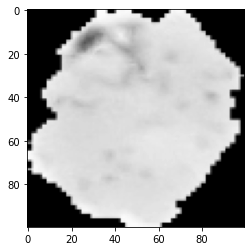

In [33]:
import matplotlib.pyplot as plt
index = 5
plt.imshow(X_test[index].reshape(100,100),cmap='gray')
print(y_test[index])

In [34]:
X_train = X_train.reshape(train.shape[0],100,100,1).astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape(test.shape[0],100,100,1).astype('float32')
X_test = X_test / 255.0

In [35]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [36]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)

X_train shape (2000, 100, 100, 1)
Y_train shape (2000, 2)


In [37]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [38]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)      

In [40]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
r=model.fit(X_train,y_train,batch_size=50,epochs=10,verbose=2)

Train on 2000 samples
Epoch 1/10
2000/2000 - 11s - loss: 0.6649 - acc: 0.5870
Epoch 2/10
2000/2000 - 11s - loss: 0.5436 - acc: 0.7115
Epoch 3/10
2000/2000 - 11s - loss: 0.3701 - acc: 0.8330
Epoch 4/10
2000/2000 - 12s - loss: 0.2270 - acc: 0.9105
Epoch 5/10
2000/2000 - 12s - loss: 0.1162 - acc: 0.9605
Epoch 6/10
2000/2000 - 12s - loss: 0.0710 - acc: 0.9755
Epoch 7/10
2000/2000 - 12s - loss: 0.0515 - acc: 0.9865
Epoch 8/10
2000/2000 - 12s - loss: 0.0291 - acc: 0.9895
Epoch 9/10
2000/2000 - 11s - loss: 0.0215 - acc: 0.9925
Epoch 10/10


In [ ]:
predictions = model.evaluate(X_test,y_test)

In [ ]:
#model.save("malaria.h5")

In [ ]:
sto=time.time()
print("time",(sto-st)/60)

#  **Testing model **

In [ ]:
X_test.shape

In [ ]:
index = 3
import numpy as np
#plt.imshow(X_test[index].reshape(100,100),cmap='gray')
#print("Predicted", model.predict([[X_test[index]]]))
img=[[X_test[index]]]
print("Predicted classs",model.predict_classes(img))